# Tiền xử lý dữ liệu
- Load dữ liệu từ CSV
- is null
- duplicate
- outliter
- format/ title

In [474]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [475]:
df = pd.read_csv("data/survey.csv")
df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [476]:
df.isnull().sum()

Timestamp                         0
Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                     

In [477]:
df_filled_0 = df.fillna(0)
df_filled_0.isnull().sum()
df_filled_0.tail()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
731,10/30/2022 14:37:28,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,...,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve,I understand.
732,11/1/2022 22:26:42,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,...,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve,I understand.
733,11/3/2022 23:24:38,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,...,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve,I understand.
734,11/4/2022 17:31:47,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,...,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve,I understand.
735,11/9/2022 1:55:20,29.0,YouTube Music,2.0,Yes,No,No,Hip hop,Yes,Yes,...,Very frequently,Very frequently,Very frequently,Rarely,2.0,2.0,2.0,5.0,Improve,I understand.


In [478]:
df_bfill = df.bfill()
df_bfill.isnull().sum()

Timestamp                       0
Age                             0
Primary streaming service       0
Hours per day                   0
While working                   0
Instrumentalist                 0
Composer                        0
Fav genre                       0
Exploratory                     0
Foreign languages               0
BPM                             0
Frequency [Classical]           0
Frequency [Country]             0
Frequency [EDM]                 0
Frequency [Folk]                0
Frequency [Gospel]              0
Frequency [Hip hop]             0
Frequency [Jazz]                0
Frequency [K pop]               0
Frequency [Latin]               0
Frequency [Lofi]                0
Frequency [Metal]               0
Frequency [Pop]                 0
Frequency [R&B]                 0
Frequency [Rap]                 0
Frequency [Rock]                0
Frequency [Video game music]    0
Anxiety                         0
Depression                      0
Insomnia      

In [479]:
print(df.columns.tolist())

['Timestamp', 'Age', 'Primary streaming service', 'Hours per day', 'While working', 'Instrumentalist', 'Composer', 'Fav genre', 'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]', 'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]', 'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]', 'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects', 'Permissions']


In [480]:
# cols = ["Hours per day", "Anxiety", "Depression", "Insomnia", "OCD", "Music effects"]
df = df.iloc[:, 1:-1]
df.tail()

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
731,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,120.0,...,Very frequently,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve
732,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,160.0,...,Very frequently,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve
733,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,120.0,...,Sometimes,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve
734,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,170.0,...,Never,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve
735,29.0,YouTube Music,2.0,Yes,No,No,Hip hop,Yes,Yes,98.0,...,Sometimes,Very frequently,Very frequently,Very frequently,Rarely,2.0,2.0,2.0,5.0,Improve


In [481]:
labels = df['Music effects'].unique().tolist()
effect_map = {v: i for i, v in enumerate(labels)}
effect_map

{nan: 0, 'No effect': 1, 'Improve': 2, 'Worsen': 3}

In [482]:
labels = df['Fav genre'].unique().tolist()
genre_map = {v: i for i, v in enumerate(labels)}
genre_map

{'Latin': 0,
 'Rock': 1,
 'Video game music': 2,
 'Jazz': 3,
 'R&B': 4,
 'K pop': 5,
 'Country': 6,
 'EDM': 7,
 'Hip hop': 8,
 'Pop': 9,
 'Rap': 10,
 'Classical': 11,
 'Metal': 12,
 'Folk': 13,
 'Lofi': 14,
 'Gospel': 15}

In [483]:
labels = df['Primary streaming service'].unique().tolist()
service_map = {v: i for i, v in enumerate(labels)}
service_map

{'Spotify': 0,
 'Pandora': 1,
 'YouTube Music': 2,
 'I do not use a streaming service.': 3,
 'Apple Music': 4,
 'Other streaming service': 5,
 nan: 6}

In [484]:
labels = df['While working'].unique().tolist()
working_map = {v: i for i, v in enumerate(labels)}
working_map

{'Yes': 0, 'No': 1, nan: 2}

In [485]:
labels = df['Instrumentalist'].unique().tolist()
instru_map = {v: i for i, v in enumerate(labels)}
instru_map

{'Yes': 0, 'No': 1, nan: 2}

In [486]:
labels = df['Composer'].unique().tolist()
compos_map = {v: i for i, v in enumerate(labels)}
compos_map

{'Yes': 0, 'No': 1, nan: 2}

In [487]:
labels = df['Exploratory'].unique().tolist()
exploratory_map = {v: i for i, v in enumerate(labels)}
exploratory_map

{'Yes': 0, 'No': 1}

In [488]:
labels = df['Foreign languages'].unique().tolist()
languages_map = {v: i for i, v in enumerate(labels)}
languages_map

{'Yes': 0, 'No': 1, nan: 2}

In [489]:
labels = df['Frequency [Classical]'].unique().tolist()
freqclass_map = {v: i for i, v in enumerate(labels)}
freqclass_map

{'Rarely': 0, 'Sometimes': 1, 'Never': 2, 'Very frequently': 3}

In [490]:
labels = df['Frequency [Country]'].unique().tolist()
freqcount_map = {v: i for i, v in enumerate(labels)}
freqcount_map

{'Never': 0, 'Sometimes': 1, 'Very frequently': 2, 'Rarely': 3}

In [491]:
labels = df['Frequency [EDM]'].unique().tolist()
freqedm_map = {v: i for i, v in enumerate(labels)}
freqedm_map

{'Rarely': 0, 'Never': 1, 'Very frequently': 2, 'Sometimes': 3}

In [492]:
labels = df['Frequency [Folk]'].unique().tolist()
freqfolk_map = {v: i for i, v in enumerate(labels)}
freqfolk_map

{'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Very frequently': 3}

In [493]:
labels = df['Frequency [Gospel]'].unique().tolist()
freqgospel_map = {v: i for i, v in enumerate(labels)}
freqgospel_map

{'Never': 0, 'Sometimes': 1, 'Rarely': 2, 'Very frequently': 3}

In [494]:
labels = df['Frequency [Hip hop]'].unique().tolist()
freqhiphop_map = {v: i for i, v in enumerate(labels)}
freqhiphop_map

{'Sometimes': 0, 'Rarely': 1, 'Never': 2, 'Very frequently': 3}

In [495]:
labels = df['Frequency [Jazz]'].unique().tolist()
freqjazz_map = {v: i for i, v in enumerate(labels)}
freqjazz_map

{'Never': 0, 'Very frequently': 1, 'Rarely': 2, 'Sometimes': 3}

In [496]:
labels = df['Frequency [K pop]'].unique().tolist()
freqkpop_map = {v: i for i, v in enumerate(labels)}
freqkpop_map

{'Very frequently': 0, 'Rarely': 1, 'Sometimes': 2, 'Never': 3}

In [497]:
labels = df['Frequency [Latin]'].unique().tolist()
freqlatin_map = {v: i for i, v in enumerate(labels)}
freqlatin_map

{'Very frequently': 0, 'Sometimes': 1, 'Never': 2, 'Rarely': 3}

In [498]:
labels = df['Frequency [Lofi]'].unique().tolist()
freqlofi_map = {v: i for i, v in enumerate(labels)}
freqlofi_map

{'Rarely': 0, 'Sometimes': 1, 'Very frequently': 2, 'Never': 3}

In [499]:
labels = df['Frequency [Metal]'].unique().tolist()
freqmetal_map = {v: i for i, v in enumerate(labels)}
freqmetal_map

{'Never': 0, 'Sometimes': 1, 'Rarely': 2, 'Very frequently': 3}

In [500]:
labels = df['Frequency [Pop]'].unique().tolist()
freqpop_map = {v: i for i, v in enumerate(labels)}
freqpop_map

{'Very frequently': 0, 'Sometimes': 1, 'Rarely': 2, 'Never': 3}

In [501]:
labels = df['Frequency [R&B]'].unique().tolist()
freqrnb_map = {v: i for i, v in enumerate(labels)}
freqrnb_map

{'Sometimes': 0, 'Never': 1, 'Very frequently': 2, 'Rarely': 3}

In [502]:
labels = df['Frequency [Rap]'].unique().tolist()
freqrap_map = {v: i for i, v in enumerate(labels)}
freqrap_map

{'Very frequently': 0, 'Rarely': 1, 'Never': 2, 'Sometimes': 3}

In [503]:
labels = df['Frequency [Rock]'].unique().tolist()
freqrock_map = {v: i for i, v in enumerate(labels)}
freqrock_map

{'Never': 0, 'Very frequently': 1, 'Rarely': 2, 'Sometimes': 3}

In [504]:
labels = df["Frequency [Video game music]"].unique().tolist()
freqvgm_map = {v: i for i, v in enumerate(labels)}
freqvgm_map

{'Sometimes': 0, 'Rarely': 1, 'Very frequently': 2, 'Never': 3}

In [505]:
df["Music effects"] = df["Music effects"].map(effect_map)
df["Fav genre"] = df["Fav genre"].map(genre_map)
df["Primary streaming service"] = df["Primary streaming service"].map(service_map)
df["While working"] = df["While working"].map(working_map)
df["Instrumentalist"] = df["Instrumentalist"].map(instru_map)
df["Composer"] = df["Composer"].map(compos_map)
df["Exploratory"] = df["Exploratory"].map(exploratory_map)
df["Foreign languages"] = df["Foreign languages"].map(languages_map)
df["Frequency [Classical]"] = df["Frequency [Classical]"].map(freqclass_map)
df["Frequency [Country]"] = df["Frequency [Country]"].map(freqcount_map)
df["Frequency [EDM]"] = df["Frequency [EDM]"].map(freqedm_map)
df["Frequency [Folk]"] = df["Frequency [Folk]"].map(freqfolk_map)
df["Frequency [Gospel]"] = df["Frequency [Gospel]"].map(freqgospel_map)
df["Frequency [Hip hop]"] = df["Frequency [Hip hop]"].map(freqhiphop_map)
df["Frequency [Jazz]"] = df["Frequency [Jazz]"].map(freqjazz_map)
df["Frequency [K pop]"] = df["Frequency [K pop]"].map(freqkpop_map)
df["Frequency [Latin]"] = df["Frequency [Latin]"].map(freqlatin_map)
df["Frequency [Lofi]"] = df["Frequency [Lofi]"].map(freqlofi_map)
df["Frequency [Metal]"] = df["Frequency [Metal]"].map(freqmetal_map)
df["Frequency [R&B]"] = df["Frequency [R&B]"].map(freqrnb_map)
df["Frequency [Rap]"] = df["Frequency [Rap]"].map(freqrap_map)
df["Frequency [Rock]"] = df["Frequency [Rock]"].map(freqrock_map)
df["Frequency [Video game music]"] = df["Frequency [Video game music]"].map(freqvgm_map)
df["Frequency [Pop]"] = df["Frequency [Pop]"].map(freqpop_map)
df

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
0,18.0,0,3.0,0,0,0,0,0,0,156.0,...,0,0,0,0,0,3.0,0.0,1.0,0.0,0
1,63.0,1,1.5,0,1,1,1,0,1,119.0,...,1,0,1,1,1,7.0,2.0,2.0,1.0,0
2,18.0,0,4.0,1,1,1,2,1,0,132.0,...,2,1,1,2,2,7.0,7.0,10.0,2.0,1
3,61.0,2,2.5,0,1,0,3,0,0,84.0,...,1,0,2,0,3,9.0,7.0,3.0,3.0,2
4,18.0,0,4.0,0,1,1,4,0,1,107.0,...,1,2,0,0,1,7.0,2.0,5.0,9.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,17.0,0,2.0,0,0,1,1,0,0,120.0,...,0,1,1,1,3,7.0,6.0,0.0,9.0,2
732,18.0,0,1.0,0,0,1,9,0,0,160.0,...,0,1,2,3,0,3.0,2.0,2.0,5.0,2
733,19.0,5,6.0,0,1,0,10,0,1,120.0,...,1,0,3,2,1,2.0,2.0,2.0,2.0,2
734,19.0,0,5.0,0,0,1,11,1,1,170.0,...,3,1,2,0,0,2.0,3.0,2.0,1.0,2


# Phân tích mối quan hệ của các thuộc tính
- heatmap
- biểu đồ (cột/đường/top 10)

<function matplotlib.pyplot.show(close=None, block=None)>

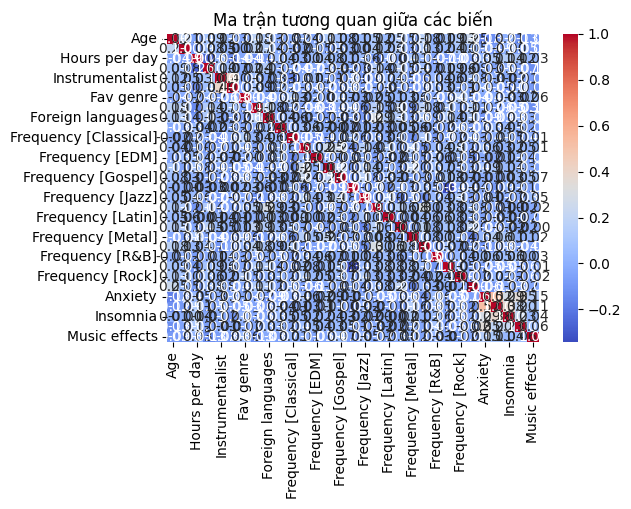

In [506]:
plt.figure(figsize=(6,4))
sb.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Ma trận tương quan giữa các biến")
plt.show

# Train - test - prediction
- Tạo mô hình
- Chia tập train - test
- Train (fit)
- Đánh giá mô hình với R^2 + MSE với tập test
- Dự đoán (có thể vẽ mô hình)

In [507]:
model = LinearRegression()
X = df[["Anxiety", "Depression", "Insomnia", "OCD"]]
y = df["Hours per day"]

In [508]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=36)

In [509]:
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [510]:
y_pred = model.predict(X_test)

In [511]:
coef_df = pd.DataFrame(model.coef_, X.columns, columns=['Hệ số (beta)'])
print("Hệ số hồi quy:", coef_df)
print(f"Hệ số chặn: {model.intercept_:.4f}")
# In phương trình hồi quy tuyến tính
print("\nPhương trình hồi quy tuyến tính:")
equation = f"Sales = {model.intercept_:.4f}"

for col, coef in zip(X.columns, model.coef_):
    equation += f" + ({coef:.4f})*{col}"
print(equation)

Hệ số hồi quy:             Hệ số (beta)
Anxiety        -0.054670
Depression      0.093100
Insomnia        0.082642
OCD             0.125101
Hệ số chặn: 2.8963

Phương trình hồi quy tuyến tính:
Sales = 2.8963 + (-0.0547)*Anxiety + (0.0931)*Depression + (0.0826)*Insomnia + (0.1251)*OCD


In [512]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.4f}")
print(f"R²: {r2:.4f}")

# so sánh thực tế
comparion = pd.DataFrame({"Thực tế": y_test, "Dự đoán": y_pred})
print(comparion.head())

MSE: 6.1820
R²: -0.0097
     Thực tế   Dự đoán
448      2.0  2.568316
525      4.0  4.687704
384      2.0  3.144260
498      3.0  2.677655
306      2.0  3.572653


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2604\455765965.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_temp[[c for c in features if c != col]] = X_test[[c for c in features if c != col]].mean()
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2604\455765965.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_temp[[c for c in features if c != col]] = X_test[[c for c in features if c != col]].mean()
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2604\455765965.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (cons

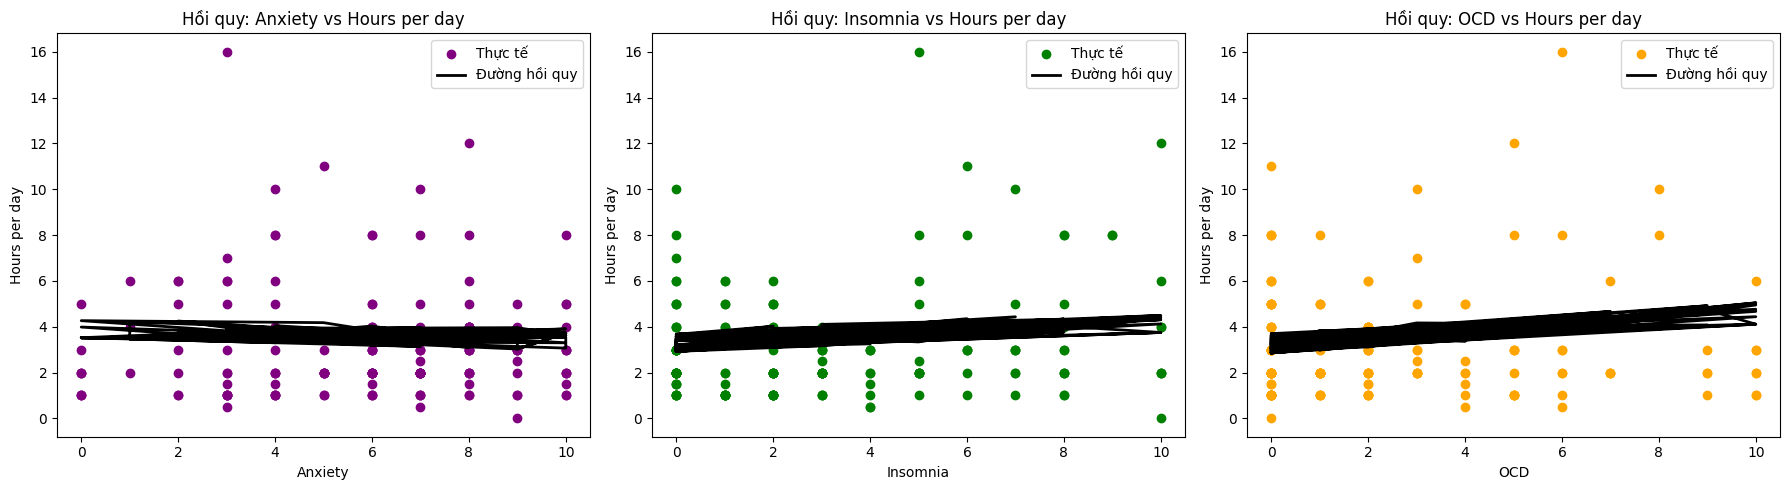

In [513]:
fig, axs = plt.subplots(1, 3, figsize=(18,5))

features = ['Anxiety', 'Insomnia', 'OCD']
colors = ['purple', 'green', 'orange']

for i, col in enumerate(features):
    axs[i].scatter(X_test[col], y_test, color=colors[i], label='Thực tế')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Hours per day')
    axs[i].set_title(f'Hồi quy: {col} vs Hours per day')

    # Tính giá trị dự đoán tuyến tính theo cột hiện tại (giữ các biến khác ở giá trị trung bình)
    X_temp = X_test.copy()
    X_temp[[c for c in features if c != col]] = X_test[[c for c in features if c != col]].mean()
    y_line = model.predict(X_temp)
    
    # Vẽ đường hồi quy
    axs[i].plot(X_test[col], y_line, color='black', linewidth=2, label='Đường hồi quy')

    axs[i].legend()

plt.tight_layout()
plt.show()